# Debugger Demo
Please set VSCode workspace directory to `JISDLab/`

In [1]:
var dbg = new Debugger("jisd.demo.HelloWorld", "-cp sample");
dbg.watch(20);
dbg.watch(22);
dbg.run(1000);
dbg.exit();
ArrayList<DebugResult> results = dbg.getResults();
results.forEach(res -> {
    println("-----------------------------");
    var loc = res.getLocation();
    println(loc.getLineNumber());
    println(loc.getVarName());
    println(res.getLatestValue());
});

>> Debugger Info: Deferring breakpoint in jisd.demo.HelloWorld. It will be set after the class is loaded.
>> Debugger Info: Deferring breakpoint in jisd.demo.HelloWorld. It will be set after the class is loaded.
>> Debugger Info: Debugger started.
Hello, Bob
Hello, Alice
>> Debugger Info: VM exited.
-----------------------------
20
a
a=0

-----------------------------
20
args
args=instance of java.lang.String[0] (id=69)

-----------------------------
20
hello
hello=instance of jisd.demo.HelloWorld(id=71)

-----------------------------
20
me
me="Alice"

-----------------------------
22
a
a=1

-----------------------------
22
args
args=instance of java.lang.String[0] (id=69)

-----------------------------
22
hello
hello=instance of jisd.demo.HelloWorld(id=71)

-----------------------------
22
me
me="Alice"



# Graph Demo

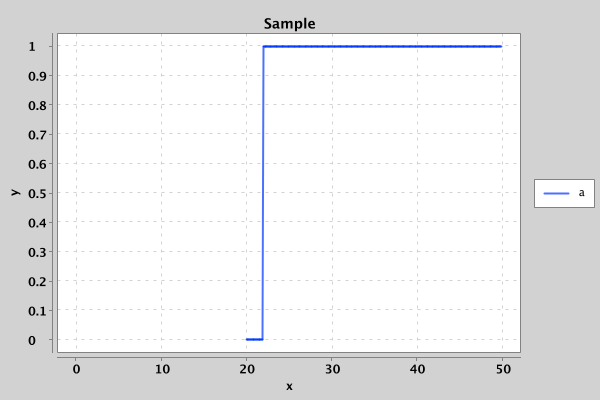

In [2]:
ArrayList<Double> x = new ArrayList<>();
ArrayList<Double> y = new ArrayList<>();
ArrayList<DebugResult> resA = dbg.getResults("a");
ArrayList<Double> valA = new ArrayList<>();
ArrayList<Double> lineA = new ArrayList<>();
int sizeA = resA.size();
for (int i = 0; i < sizeA; i++) {
    DebugResult res = resA.get(i);
    Location loc = res.getLocation();
    double val = Double.parseDouble(res.getLatestValue().getValue());
    double line = loc.getLineNumber();
    valA.add(val);
    lineA.add(line);
}

int resNextIndex = 0;
double val = valA.get(resNextIndex);
double lLine = lineA.get(resNextIndex++);
double rLine = lineA.get(resNextIndex++);
double xMin = 0.0;
double xMax = 50.0;
for (double i = lLine; i < xMax; i += 0.1) {
    x.add(i);
    if (i >= lLine && i < rLine) {
        y.add(val);
    } else if (i >= rLine) {
        val = valA.get(resNextIndex-1);
        lLine = rLine;
        rLine = (resNextIndex < sizeA) ? lineA.get(resNextIndex++) : xMax;
        y.add(val);
    } else {
        y.add(0.0);
    }
}
XYChart chart = QuickChart.getChart("Sample", "x", "y", "a", x, y);
chart.getStyler().setXAxisMin(xMin);
chart.getStyler().setXAxisMax(xMax);
BitmapEncoder.getBufferedImage(chart);

# Static Infomation Demo

In [3]:
var sif = new StaticInfoFactory("debugspace", "sample"); // set srcDir and binDir
ClassInfo ci = sif.createClass("jisd.demo.HelloWorld")

In [4]:
ci.fieldNames()

[a, helloTo]

In [5]:
ci.methodNames()

[sayHello(), setHelloTo(java.lang.String), HelloWorld(java.lang.String), main(java.lang.String[])]

In [6]:
var fi = ci.field("helloTo");
fi.name()

this.helloTo

In [7]:
var mi = ci.method("main(java.lang.String[])");
mi.localNames()

[args, a, me, hello, this.a, this.helloTo]

In [8]:
var li = mi.local("a")

In [9]:
li.canSet()

[18, 19, 20, 21, 22, 23, 25]

# Execute External Program Demo

#### Use %exec magic

In [10]:
%exec pwd

/Users/saku/Workspace/2020/JISDLab


#### Use debug.Utility.exec()

In [11]:
var res = exec("pwd").get() // var res = exec("powershell -Command pwd").get()

/Users/saku/Workspace/2020/JISDLab


In [12]:
res[0] // stdout

/Users/saku/Workspace/2020/JISDLab


In [13]:
res[1] // stderr

In [14]:
res[2] // exit code (String)

0